# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* Using Cross-validation
* Using Bootstrapping


## Test dataset

In [97]:
data <- read.table(unz("BlackFriday.csv.zip", "BlackFriday.csv"), header=T, quote="\"", sep=",")

In [98]:
head(data)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1000001,P00069042,F,0-17,10,A,2,0,3,NA,NA,8370
2,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
3,1000001,P00087842,F,0-17,10,A,2,0,12,NA,NA,1422
4,1000001,P00085442,F,0-17,10,A,2,0,12,14,NA,1057
5,1000002,P00285442,M,55+,16,C,4+,0,8,NA,NA,7969
6,1000003,P00193542,M,26-35,15,A,3,0,1,2,NA,15227


In [99]:
dim(data)

[1] 537577     12

In [100]:
data$Age <- factor(data$Age)
data$Gender <- factor(data$Gender)
data$Occupation <- factor(data$Occupation)
data$City_Category <- factor(data$City_Category)
data$Stay_In_Current_City_Years <- factor(data$Stay_In_Current_City_Years)
data$Marital_Status <- factor(data$Marital_Status)
data$Product_Category_1 <- factor(data$Product_Category_1)
data$Product_Category_2 <- factor(ifelse(is.na(data$Product_Category_2),0,data$Product_Category_2))
data$Product_Category_3 <- factor(ifelse(is.na(data$Product_Category_3),0,data$Product_Category_3))


In [101]:
table(data$Stay_In_Current_City_Years)


     0      1      2      3     4+ 
 72725 189192  99459  93312  82889 

In [102]:
summary(data)

    User_ID         Product_ID        Gender        Age        
 Min.   :1000001   Length:537577      F:132197   0-17 : 14707  
 1st Qu.:1001495   Class :character   M:405380   18-25: 97634  
 Median :1003031   Mode  :character              26-35:214690  
 Mean   :1002992                                 36-45:107499  
 3rd Qu.:1004417                                 46-50: 44526  
 Max.   :1006040                                 51-55: 37618  
                                                 55+  : 20903  
   Occupation     City_Category Stay_In_Current_City_Years Marital_Status
 4      : 70862   A:144638      0 : 72725                  0:317817      
 0      : 68120   B:226493      1 :189192                  1:219760      
 7      : 57806   C:166446      2 : 99459                                
 1      : 45971                 3 : 93312                                
 17     : 39090                 4+: 82889                                
 20     : 32910                             

In [103]:
vn <- setdiff(names(data),c("Product_ID","User_ID"))

In [104]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

Loading required package: mechkar



In [18]:
Table1(data = data,x = vn,y = "City_Category")

Warning message in Table1(data = data, x = vn, y = "City_Category"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


  |===============================================================       |  90%

V1,V2,Pop,A,B,C,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,537577,144638,226493,166446,NA
Gender,F,"132,197 (24.6%)","34,807 (24.1%)","56,494 (24.9%)","40,896 (24.6%)",NA
Gender,M,"405,380 (75.4%)","109,831 (75.9%)","169,999 (75.1%)","125,550 (75.4%)",0
Age,0-17,"14,707 (2.7%)","2,497 (1.7%)","5,288 (2.3%)","6,922 (4.2%)",NA
Age,18-25,"97,634 (18.2%)","27,025 (18.7%)","42,470 (18.8%)","28,139 (16.9%)",0
Age,26-35,"214,690 (39.9%)","72,048 (49.8%)","89,767 (39.6%)","52,875 (31.8%)",NA
Age,36-45,"107,499 (20.0%)","26,142 (18.1%)","46,605 (20.6%)","34,752 (20.9%)",NA
Age,46-50,"44,526 (8.3%)","7,467 (5.2%)","19,900 (8.8%)","17,159 (10.3%)",NA
Age,51-55,"37,618 (7.0%)","5,969 (4.1%)","17,435 (7.7%)","14,214 (8.5%)",NA


In [105]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=False)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Test dataset

In [106]:
tab1 <- train_test(data = data[,vn], train_name = "temp", test_name = "test",prop = 0.8, seed = 123, tableone=T)

Warning message in Table1(data = data, y = "traintest_ind_", x = names(train), messages = F):
"The following variables have unique values and will not be included in the analysis: "


  |================================================================      |  91%

You got a perfectly balanced training and test datasets

 

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test



In [107]:
dim(temp)
dim(test)

[1] 430061     10

[1] 107516     10

In [108]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,537577,430061,107516,NA
Gender,F,"132,197 (24.6%)","105,924 (24.6%)","26,273 (24.4%)",NA
Gender,M,"405,380 (75.4%)","324,137 (75.4%)","81,243 (75.6%)",0.189
Age,0-17,"14,707 (2.7%)","11,768 (2.7%)","2,939 (2.7%)",NA
Age,18-25,"97,634 (18.2%)","78,137 (18.2%)","19,497 (18.1%)",0.747
Age,26-35,"214,690 (39.9%)","171,860 (40.0%)","42,830 (39.8%)",NA
Age,36-45,"107,499 (20.0%)","86,039 (20.0%)","21,460 (20.0%)",NA
Age,46-50,"44,526 (8.3%)","35,601 (8.3%)","8,925 (8.3%)",NA
Age,51-55,"37,618 (7.0%)","30,010 (7.0%)","7,608 (7.1%)",NA


In [109]:
tab1 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


## Train and Dev

In [110]:
tab2 <- train_test(data = temp[,vn], train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

Warning message in Table1(data = data, y = "traintest_ind_", x = names(train), messages = F):
"The following variables have unique values and will not be included in the analysis: "


  |================================================================      |  91%

You got a perfectly balanced training and test datasets

 

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev



In [111]:
dim(train)
dim(dev)

[1] 344048     10

[1] 86013    10

In [112]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,430061,344048,86013,NA
Gender,F,"105,924 (24.6%)","84,668 (24.6%)","21,256 (24.7%)",NA
Gender,M,"324,137 (75.4%)","259,380 (75.4%)","64,757 (75.3%)",0.533
Age,0-17,"11,768 (2.7%)","9,513 (2.8%)","2,255 (2.6%)",NA
Age,18-25,"78,137 (18.2%)","62,607 (18.2%)","15,530 (18.1%)",0.103
Age,26-35,"171,860 (40.0%)","137,258 (39.9%)","34,602 (40.2%)",NA
Age,36-45,"86,039 (20.0%)","68,877 (20.0%)","17,162 (20.0%)",NA
Age,46-50,"35,601 (8.3%)","28,494 (8.3%)","7,107 (8.3%)",NA
Age,51-55,"30,010 (7.0%)","24,056 (7.0%)","5,954 (6.9%)",NA


In [113]:
tab2 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


In [114]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

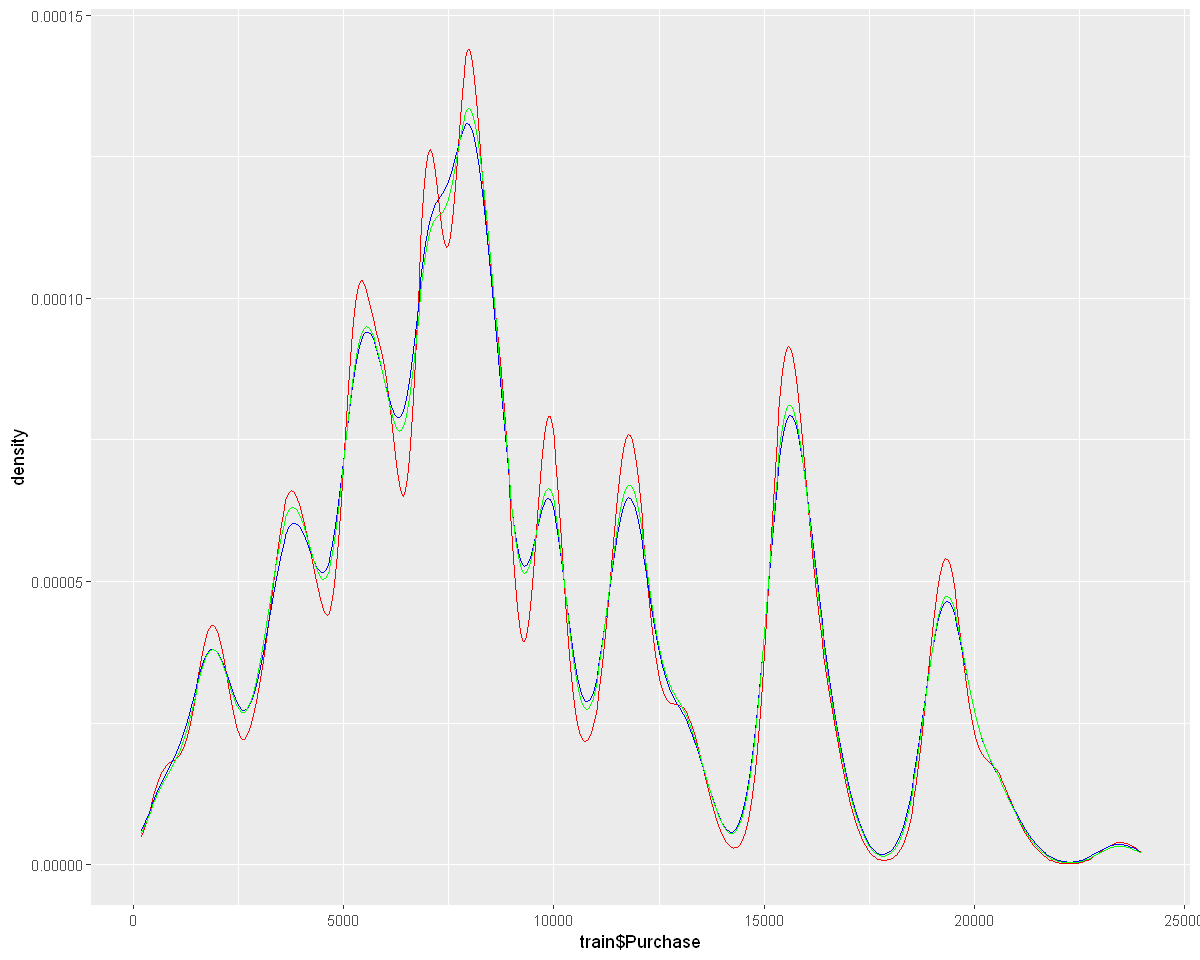

In [115]:
require(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 8)

ggplot() +
    geom_density(aes(x=train$Purchase),color="red",alpha=0.3) +
    geom_density(aes(x=dev$Purchase),color="blue",alpha=0.3) +
    geom_density(aes(x=test$Purchase),color="green",alpha=0.3)


# Train-Dev

In [29]:
library(ranger)

mod1 <- ranger(Purchase ~., data=train)


Warning message:
"package 'ranger' was built under R version 4.0.2"


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 49 seconds.
Growing trees.. Progress: 45%. Estimated remaining time: 1 minute, 15 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 43 seconds.
Growing trees.. Progress: 91%. Estimated remaining time: 11 seconds.


In [30]:
mod1

Ranger result

Call:
 ranger(Purchase ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      344048 
Number of independent variables:  9 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       8550236 
R squared (OOB):                  0.6550443 

In [32]:
pred1 <- predict(mod1, data=test)


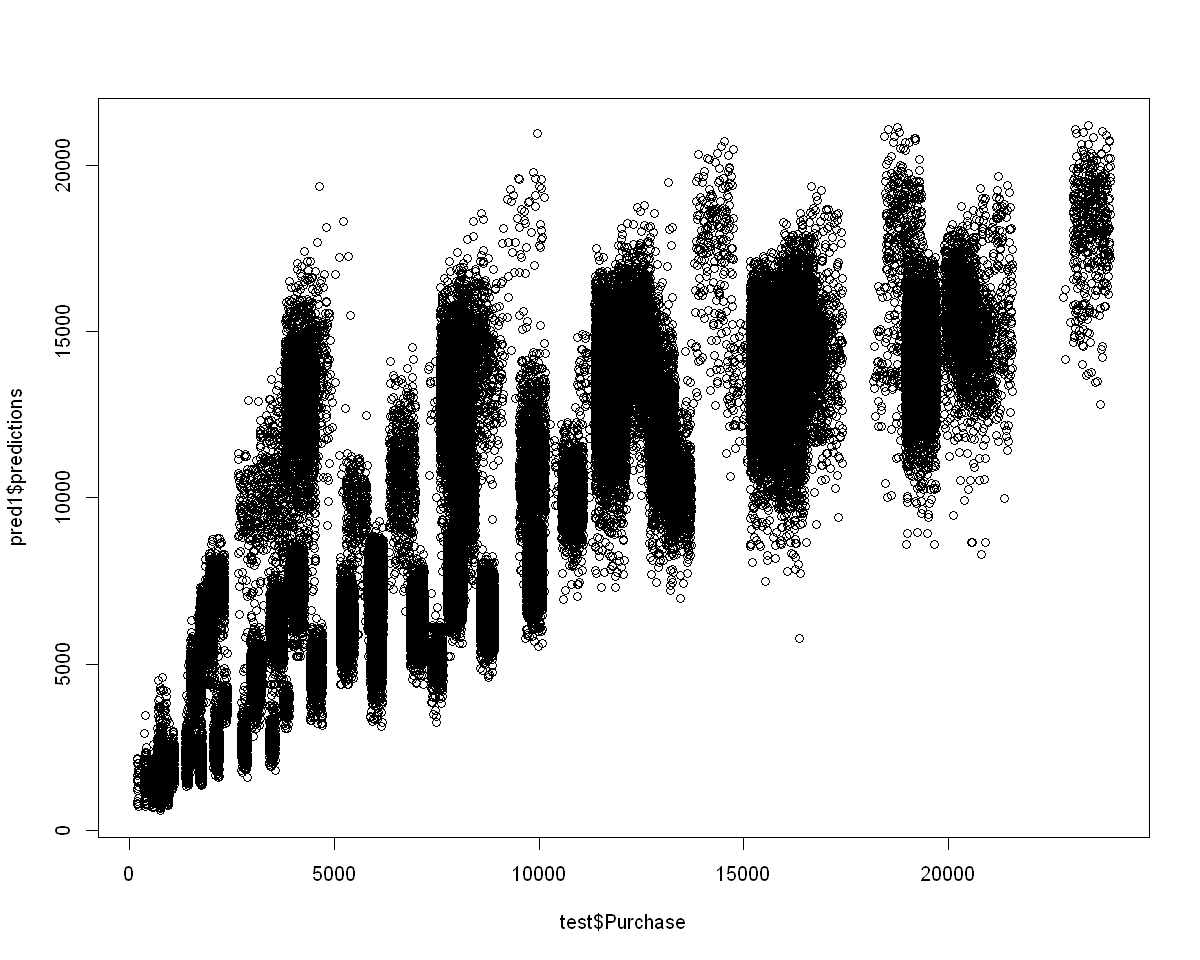

In [34]:
plot(pred1$predictions ~ test$Purchase)

# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [1]:
library(caret)
# load the iris dataset
data(iris)

Warning message:
"package 'caret' was built under R version 4.0.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.2"


In [11]:
set.seed(2)
seeds <- vector(mode = "list", length = 51)
for(i in 1:50) seeds[[i]] <- sample.int(1000, 22)

## For the last model:
seeds[[51]] <- sample.int(1000, 1)

# define training control
trControl <- caret::trainControl(method = "repeatedcv", repeats = 5, seeds = seeds)
# train the model
model <- train(Species~., data=iris, trControl=trControl, method="ctree")

In [12]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy  Kappa
  0.01          0.94      0.91 
  0.50          0.94      0.91 
  0.99          0.94      0.91 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Leave-one-out Cross Validation

In [13]:
# define training control
train_control <- trainControl(method="LOOCV")
# train the model
model <- train(Species~., data=iris, trControl=train_control, method="ctree")

In [14]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 149, 149, 149, 149, 149, 149, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa
  0.01          0.9333333  0.9  
  0.50          0.9333333  0.9  
  0.99          0.9333333  0.9  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


In [116]:
?caret::trainControl

In [117]:
?carer::train

ERROR: Error in find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'carer'


# Boostrapping



In [16]:
# define training control
train_control <- trainControl(method="boot", number=100)
# train the model
model <- train(Species~., data=iris, trControl=train_control,method="ctree")

In [17]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 150, 150, 150, 150, 150, 150, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.01          0.9393788  0.9080796
  0.50          0.9393788  0.9080796
  0.99          0.9393788  0.9080796

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Dataset Inbalance

In [18]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'imbalance'"
Installing package into 'C:/Users/Thomas/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'Cubist', 'bnlearn', 'KernelKnn', 'smotefamily', 'FNN', 'C50'




package 'Cubist' successfully unpacked and MD5 sums checked
package 'bnlearn' successfully unpacked and MD5 sums checked
package 'KernelKnn' successfully unpacked and MD5 sums checked
package 'smotefamily' successfully unpacked and MD5 sums checked
package 'FNN' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked
package 'imbalance' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Thomas\AppData\Local\Temp\Rtmp6RGjU7\downloaded_packages


Loading required package: imbalance

Warning message:
"package 'imbalance' was built under R version 4.0.3"
Loading required package: ROSE

Loaded ROSE 0.0-3




In [19]:
data(newthyroid1)
head(newthyroid1)

,T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,105,7.3,1.5,1.5,-0.1,negative
2,67,23.3,7.4,1.8,-0.6,positive
3,111,8.4,1.5,0.8,1.2,negative
4,89,14.3,4.1,0.5,0.2,positive
5,105,9.5,1.8,1.6,3.6,negative
6,110,20.3,3.7,0.6,0.2,positive


In [20]:
table(newthyroid1$Class)
table(newthyroid1$Class)/nrow(newthyroid1)*100


negative positive 
     180       35 


negative positive 
83.72093 16.27907 

In [21]:
numPositive <- length(which(newthyroid1$Class == "positive"))
numNegative <- length(which(newthyroid1$Class == "negative"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
35,180,145


## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the mayority class 

In [22]:
data_balanced_under <- ovun.sample(Class ~ ., data = newthyroid1, method = "under",N = numPositive*2)$data
table(data_balanced_under$Class)


negative positive 
      35       35 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [23]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = newthyroid1, method = "over",N = numNegative*2)$data
table(data_balanced_over$Class)


negative positive 
     180      180 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [24]:
#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = newthyroid1, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$Class)


negative positive 
      90       90 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [25]:
# Rose: 
data.rose <- ROSE(Class ~ ., data = newthyroid1, seed = 1)$data
table(data.rose$Class)


negative positive 
     105      110 

## Oversampling with Synthetic data
 
Additionally to ROSE. The package 'inbalance' has the function pdfos. This function generates synthetic minority examples for a numerical dataset approximating a Gaussian multivariate distribution.


In [26]:
newSamples <- pdfos(dataset = newthyroid1, numInstances = nInstances,classAttr = "Class")
newDataset <- rbind(newthyroid1, newSamples)
table(newDataset$Class)


negative positive 
     180      180 

# Clustering method 

In [33]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [27]:
df <- read.table(unz("creditcard.csv.zip", "creditcard.csv"), header=T, quote="\"", sep=",")

In [28]:
summary(df)
table(df$Class)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu


     0      1 
284315    492 

In [29]:
### divide into train-test
mechkar::train_test(data=df, train_name="train", test_name="test", prop=0.7, seed=2, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


  |====================================================================  |  97%


* V22

You can try to change the seed value until you get a balanced partition.

Alternatively, you can ommit this warning and exclude those variables from your model

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,284807,199364,85443,NA
Time,Mean (SD),"94,813.9 (47,488.1)","94,848.0 (47,454.6)","94,734.2 (47,566.6)",NA
Time,Median (IQR),"84,692.0 (54,201.5-139,320.5)","84,703.5 (54,272.0-139,287.0)","84,672.0 (54,046.5-139,396.5)",0.558
V1,Mean (SD),0.0 (2.0),0.0 (2.0),0.0 (2.0),NA
V1,Median (IQR),0.0 (-0.9-1.3),0.0 (-0.9-1.3),0.0 (-0.9-1.3),0.471
V2,Mean (SD),0.0 (1.7),0.0 (1.6),0.0 (1.7),NA
V2,Median (IQR),0.1 (-0.6-0.8),0.1 (-0.6-0.8),0.1 (-0.6-0.8),0.926
V3,Mean (SD),0.0 (1.5),0.0 (1.5),0.0 (1.5),NA
V3,Median (IQR),0.2 (-0.9-1.0),0.2 (-0.9-1.0),0.2 (-0.9-1.0),0.939


In [30]:
table(train$Class)
table(train$Class)/nrow(train)

table(test$Class)
table(test$Class)/nrow(test)


     0      1 
199017    347 


          0           1 
0.998259465 0.001740535 


    0     1 
85298   145 


          0           1 
0.998302962 0.001697038 

#### Base Models

In [57]:
bm <- glm(Class ~., data=train2, family="binomial")
summary(bm)


Call:
glm(formula = Class ~ ., family = "binomial", data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0083  -0.0486  -0.0306  -0.0186   4.2068  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.861e+00  3.547e-01 -22.164  < 2e-16 ***
Time        -7.659e-09  2.964e-06  -0.003 0.997938    
V1           1.116e-01  6.236e-02   1.789 0.073633 .  
V2           2.031e-01  1.014e-01   2.003 0.045185 *  
V3           2.517e-02  7.446e-02   0.338 0.735341    
V4           6.539e-01  1.022e-01   6.399 1.56e-10 ***
V5           1.671e-01  1.010e-01   1.655 0.097962 .  
V6          -2.385e-01  1.089e-01  -2.190 0.028509 *  
V7          -1.933e-01  1.052e-01  -1.838 0.066094 .  
V8          -2.101e-01  4.961e-02  -4.236 2.28e-05 ***
V9          -1.110e-01  1.527e-01  -0.727 0.467264    
V10         -5.606e-01  1.419e-01  -3.951 7.77e-05 ***
V11         -2.879e-02  1.107e-01  -0.260 0.794755    
V12          8.830e-02  1.103e-01

In [58]:
predbm <- predict(bm,newdata=test,type="response")

In [59]:
### AUC
roc0 <- pROC::roc(test$Class, predbm)
roc0

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = predbm)

Data: predbm in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9783

In [61]:
table(obs=test$Class, pred=ifelse(predbm>0.5,1,0))

   pred
obs     0     1
  0 85228    70
  1    49    96

In [63]:
table(train$Class)


     0      1 
199017    347 

In [65]:
tr1 <- train %>% filter(Class==0)
nrow(tr1)

[1] 199017

In [68]:
#### k-means with 347 clusters
kmod <- kmeans(tr1[,1:31],centers = 347)
table(kmod$cluster)

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 9950850)"



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 710  678  601  606  836  787  739  527  909 1498  622  586  815  750  483  575 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  16  646   21  531  745  405  722  621  774  753    5   19  757  788   26  661 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 763  786  507  722   49  343  635  716  539  549  754  614  421 1082  560  476 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 822  953  648  295  771  859  750  772   25  840  456  774  745   24   30  667 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 767  841  778  907  784  806  817  695  693  502  766  703  493  585  586  613 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
 773  700  602  497  574  550   40   37    1  665  669  773  803  449  659  803 
  97   98   99  100  101  1

In [69]:
kmod$centers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,77637.6901,-0.236517238,0.117448283,0.60966847,0.01949442,-0.28753586,0.066168735,-0.16501989,0.106782319,-0.326791959,...,-0.059501748,-0.16732825,-0.0137635416,0.0320380586,0.10663606,0.046318090,-0.015684815,0.0072418942,81.03093,0
2,78410.9617,-0.162780300,0.166291363,0.56610169,0.12961958,-0.27335655,0.017577652,-0.15730070,0.026287336,-0.323617740,...,-0.075522926,-0.16287298,-0.0163609066,-0.0005596467,0.11369379,0.007112973,-0.029723011,0.0226265953,72.89885,0
3,46164.0383,-0.158558186,-0.026090872,0.71109016,0.05751390,-0.22180239,-0.003921966,-0.13997185,0.091416742,-0.265037032,...,-0.052218433,-0.12149626,-0.0009858029,-0.0091315129,0.15145502,0.039771658,0.006035123,0.0070137727,68.18015,0
4,119827.5809,0.300594931,-0.017840909,-0.52024792,-0.18526304,0.45689769,-0.160972354,0.13362395,-0.154256258,0.054745988,...,0.049971280,0.11628178,-0.0102285823,0.0158562644,-0.08507159,-0.038274118,-0.039153698,-0.0221504346,56.64243,0
5,79543.8313,-0.047652450,0.143221882,0.72942683,-0.19838411,-0.31710104,-0.108330026,-0.19063721,0.129539240,0.190769835,...,-0.068256237,-0.10246968,-0.0473619053,0.0319447798,0.19849291,-0.130529481,0.031607423,0.0025151951,45.81005,0
6,154694.0127,0.461378571,-0.038924046,-0.64817912,-0.13129236,0.16229158,-0.220558397,0.14278817,-0.026949588,-0.039779751,...,0.017178906,0.06872303,0.0594231791,0.0391859499,-0.14595946,-0.033269307,0.009726104,-0.0129246608,80.05560,0
7,141725.9702,0.161752470,-0.049224376,-0.75749057,-0.02949832,0.36453152,-0.141898479,0.16621002,-0.046166544,-0.055059457,...,0.037691479,0.11039135,0.0738653177,-0.0221563955,-0.12150766,-0.048411232,0.011891426,-0.0002115434,81.98770,0
8,68490.5256,-0.178252174,0.274962688,0.70261007,0.21453155,-0.14710503,-0.036770081,-0.12783565,0.104479056,-0.219525295,...,-0.100815329,-0.12616060,0.0140041041,0.0187839829,0.13029265,0.048180588,0.008142981,-0.0008370319,42.93159,0
9,75335.6920,-0.130955543,0.121212082,0.58390997,0.08399481,-0.22162388,-0.036709919,-0.12940573,0.088645422,-0.251034312,...,-0.044160767,-0.14834706,-0.0110747434,0.0100919874,0.12691084,0.070799256,0.007714677,0.0071003643,67.86259,0
10,825.1949,-0.323928522,0.297982741,0.85023364,0.12434559,-0.07712231,0.012110587,0.13038918,-0.046619106,0.034203636,...,-0.009909199,-0.15220018,-0.0446174482,0.0256135136,0.10577981,0.053779206,0.032561401,0.0008799941,65.88212,0


In [73]:
tr2 <- train %>% filter(Class==1)
tr2$cluster <- NULL
train.kmod <- rbind(kmod$centers, tr2)

In [74]:
table(train.kmod$Class)


  0   1 
347 347 

In [87]:
#mod.kmod <- glm(Class ~., data=train.kmod, family="binomial")
#summary(mod.kmod)
mod.kmod <- party::ctree(Class ~., data=train.kmod)
mod.kmod


	 Conditional inference tree with 6 terminal nodes

Response:  Class 
Inputs:  Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount 
Number of observations:  694 

1) V14 <= -0.4985218; criterion = 1, statistic = 411.54
  2) Amount <= 925.31; criterion = 1, statistic = 181.63
    3)*  weights = 323 
  2) Amount > 925.31
    4)*  weights = 7 
1) V14 > -0.4985218
  5) V4 <= 2.628298; criterion = 1, statistic = 57.767
    6) V26 <= -0.3434961; criterion = 1, statistic = 94.304
      7)*  weights = 7 
    6) V26 > -0.3434961
      8) V22 <= 0.2537398; criterion = 1, statistic = 70.065
        9)*  weights = 336 
      8) V22 > 0.2537398
        10)*  weights = 7 
  5) V4 > 2.628298
    11)*  weights = 14 

[1] 85443

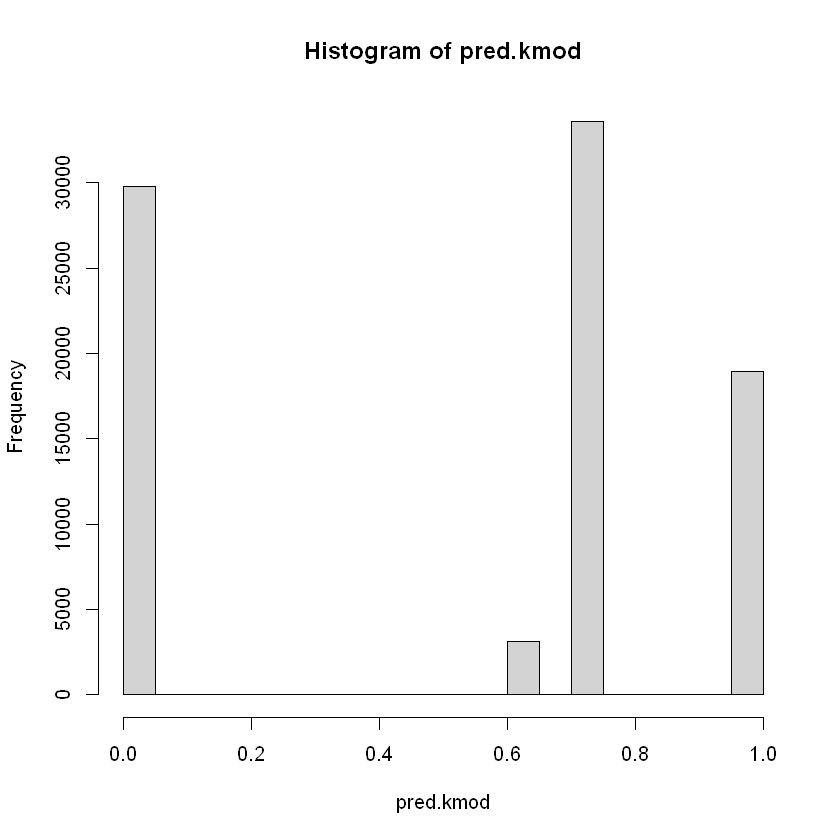

In [93]:
pred.kmod <- predict(mod.kmod,newdata=test,type="response")
hist(pred.kmod)
nrow(pred.kmod)

In [94]:
table(obs=test$Class)
table(pred=ifelse(pred.kmod>0.5,1,0))
table(obs=test$Class, pred=ifelse(pred.kmod>0.5,1,0))

obs
    0     1 
85298   145 

pred
    0     1 
29778 55665 

   pred
obs     0     1
  0 29777 55521
  1     1   144

In [95]:
### AUC
roc1 <- pROC::roc(test$Class, pred5$predictions)
roc1


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = pred5$predictions)

Data: pred5$predictions in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9567

In [40]:
#### k-means with 1000 clusters
kmod <- kmeans(train[,1:31],centers = 1000)
ktab <- data.frame(table(clust=kmod$cluster, class=train$Class))
ktab

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 9968200)"


clust,class,Freq
<fct>,<fct>,<int>
1,0,237
2,0,315
3,0,56
4,0,197
5,0,273
6,0,254
7,0,196
8,0,21
9,0,275


In [34]:
#### select clusters having at least one minority class (1)
ktab %>% filter(class==1 & Freq >0) %>% select(clust) %>% tally()

n
<int>
217


In [35]:
clust <- ktab %>% filter(class==1 & Freq >0) %>% select(clust) 

In [36]:
train$cluster <- kmod$cluster

train2 <- train %>% filter(cluster %in% as.numeric(clust$clust))

In [37]:
summary(train2)
summary(kmod$centers)

      Time              V1                  V2                 V3           
 Min.   :   402   Min.   :-40.47014   Min.   :-38.4368   Min.   :-33.68098  
 1st Qu.: 48428   1st Qu.: -0.91665   1st Qu.: -0.5196   1st Qu.: -0.71862  
 Median : 78858   Median :  0.02396   Median :  0.1054   Median :  0.29135  
 Mean   : 89049   Mean   : -0.00270   Mean   :  0.1066   Mean   :  0.09007  
 3rd Qu.:139088   3rd Qu.:  1.28729   3rd Qu.:  0.8318   3rd Qu.:  1.10921  
 Max.   :170467   Max.   :  2.45189   Max.   : 19.1672   Max.   :  4.22611  
       V4                 V5                  V6                  V7           
 Min.   :-5.41631   Min.   :-23.66973   Min.   :-23.49671   Min.   :-37.06031  
 1st Qu.:-0.80737   1st Qu.: -0.67791   1st Qu.: -0.76051   1st Qu.: -0.58485  
 Median : 0.03668   Median : -0.07334   Median : -0.27130   Median : -0.00054  
 Mean   : 0.07009   Mean   :  0.00323   Mean   : -0.02189   Mean   : -0.09109  
 3rd Qu.: 0.81024   3rd Qu.:  0.58901   3rd Qu.:  0.37416   3

      Time                V1                 V2                  V3          
 Min.   :   190.1   Min.   :-36.8023   Min.   :-63.34470   Min.   :-48.3256  
 1st Qu.: 53627.0   1st Qu.: -0.4801   1st Qu.: -1.27736   1st Qu.: -0.7643  
 Median : 84747.4   Median : -0.1459   Median :  0.05154   Median : -0.5043  
 Mean   : 94789.1   Mean   : -0.6807   Mean   : -1.19966   Mean   : -0.5213  
 3rd Qu.:141170.7   3rd Qu.:  0.2660   3rd Qu.:  0.22567   3rd Qu.:  0.6694  
 Max.   :172650.8   Max.   :  1.2142   Max.   :  1.11963   Max.   :  1.2982  
       V4                 V5                  V6                 V7           
 Min.   :-1.20980   Min.   :-113.7433   Min.   :-0.74605   Min.   : -0.88012  
 1st Qu.:-0.15522   1st Qu.:  -0.5185   1st Qu.:-0.09999   1st Qu.: -0.14242  
 Median : 0.07495   Median :  -0.1634   Median : 0.01973   Median :  0.03004  
 Mean   : 0.26626   Mean   :  -0.7888   Mean   : 0.43132   Mean   :  0.82749  
 3rd Qu.: 0.24277   3rd Qu.:   0.3088   3rd Qu.: 0.28413   

In [41]:
train2$cluster <- NULL

In [42]:
#### run logistic regression model
mod4 <- glm(Class ~., data=train2, family="binomial")
summary(mod4)


Call:
glm(formula = Class ~ ., family = "binomial", data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0083  -0.0486  -0.0306  -0.0186   4.2068  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.861e+00  3.547e-01 -22.164  < 2e-16 ***
Time        -7.659e-09  2.964e-06  -0.003 0.997938    
V1           1.116e-01  6.236e-02   1.789 0.073633 .  
V2           2.031e-01  1.014e-01   2.003 0.045185 *  
V3           2.517e-02  7.446e-02   0.338 0.735341    
V4           6.539e-01  1.022e-01   6.399 1.56e-10 ***
V5           1.671e-01  1.010e-01   1.655 0.097962 .  
V6          -2.385e-01  1.089e-01  -2.190 0.028509 *  
V7          -1.933e-01  1.052e-01  -1.838 0.066094 .  
V8          -2.101e-01  4.961e-02  -4.236 2.28e-05 ***
V9          -1.110e-01  1.527e-01  -0.727 0.467264    
V10         -5.606e-01  1.419e-01  -3.951 7.77e-05 ***
V11         -2.879e-02  1.107e-01  -0.260 0.794755    
V12          8.830e-02  1.103e-01

In [43]:
pred4 <- predict(mod4,newdata=test,type="response")

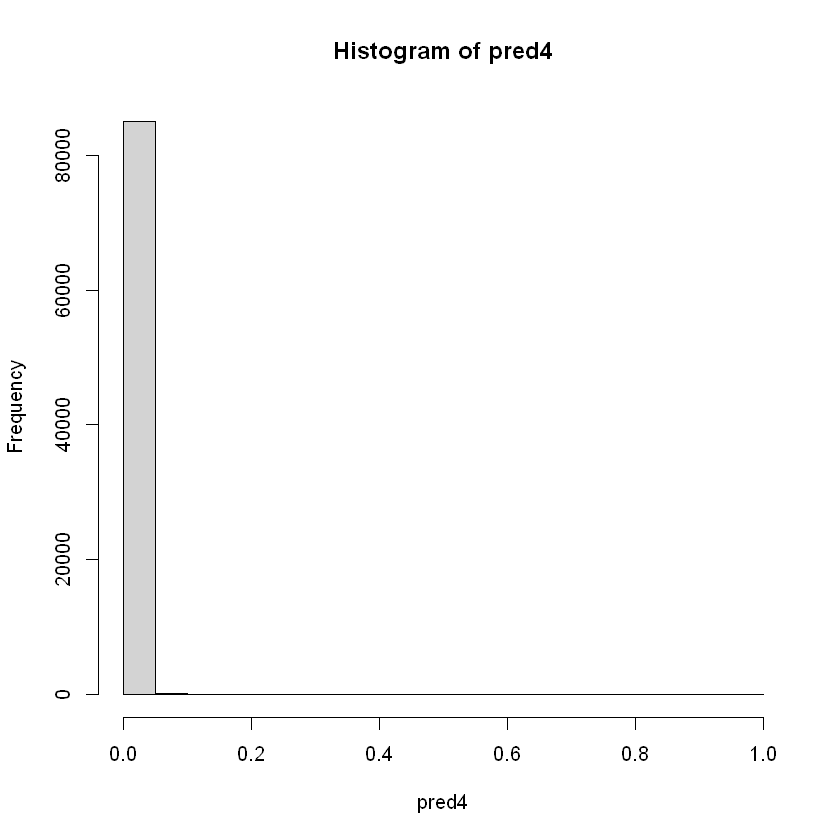

In [44]:
hist(pred4)

In [45]:
table(obs=test$Class, pred=ifelse(pred4>0.5,1,0))

   pred
obs     0     1
  0 85228    70
  1    49    96

In [51]:
### AUC
roc1 <- pROC::roc(test$Class, pred4)
roc1

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = pred4)

Data: pred4 in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9783

In [46]:
#### run random forest model
mod5 <- ranger::ranger(Class ~., data=train2)
mod5

Growing trees.. Progress: 74%. Estimated remaining time: 10 seconds.


Ranger result

Call:
 ranger::ranger(Class ~ ., data = train2) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      52361 
Number of independent variables:  30 
Mtry:                             5 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       0.001232496 
R squared (OOB):                  0.8127839 

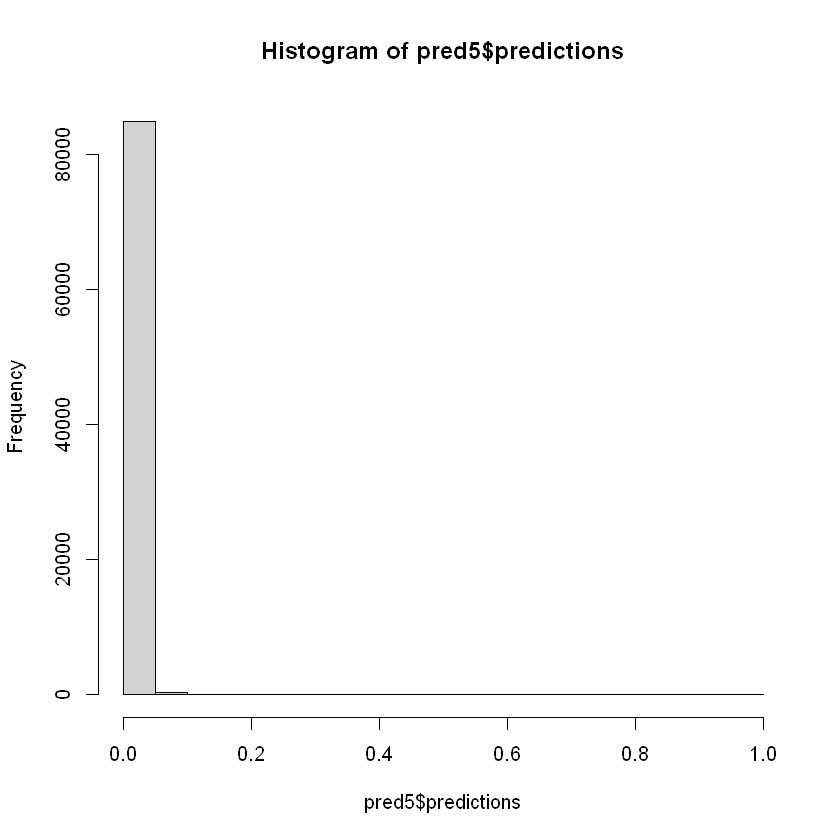

In [47]:
pred5 <- predict(mod5,data=test)
hist(pred5$predictions)

In [48]:
table(obs=test$Class, pred=ifelse(pred5$predictions>0.5,1,0))

   pred
obs     0     1
  0 85277    21
  1    34   111

In [52]:
### AUC
roc2 <- pROC::roc(test$Class, pred5$predictions)
roc2

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = pred5$predictions)

Data: pred5$predictions in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9567

   pred
obs      0      1
  0 284268     47
  1     38    454

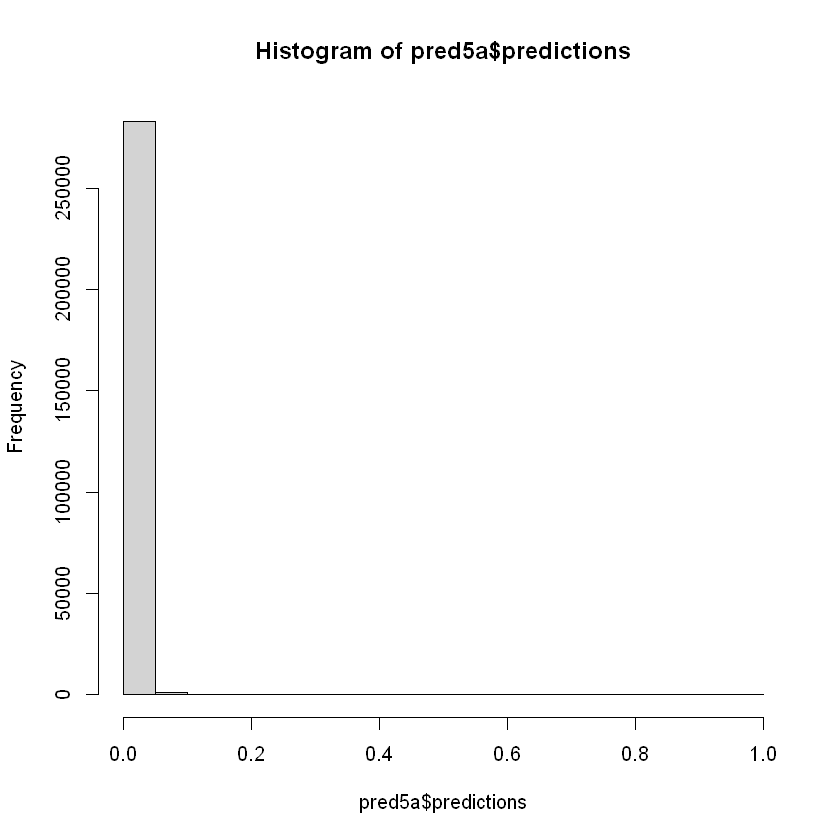

In [53]:
### Predict on whole dataset
pred5a <- predict(mod5,data=df)
hist(pred5a$predictions)
table(obs=df$Class, pred=ifelse(pred5a$predictions>0.5,1,0))

In [54]:
roc1 <- pROC::roc(df$Class, pred5a$predictions)
roc1

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df$Class, predictor = pred5a$predictions)

Data: pred5a$predictions in 284315 controls (df$Class 0) < 492 cases (df$Class 1).
Area under the curve: 0.9874